### Main Goal
Create a training data (matrix) from a raw dataset

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

### Problem with current dataset
- Trained models are not able to make good prediction after a certain period of time when the signal values are stabilized
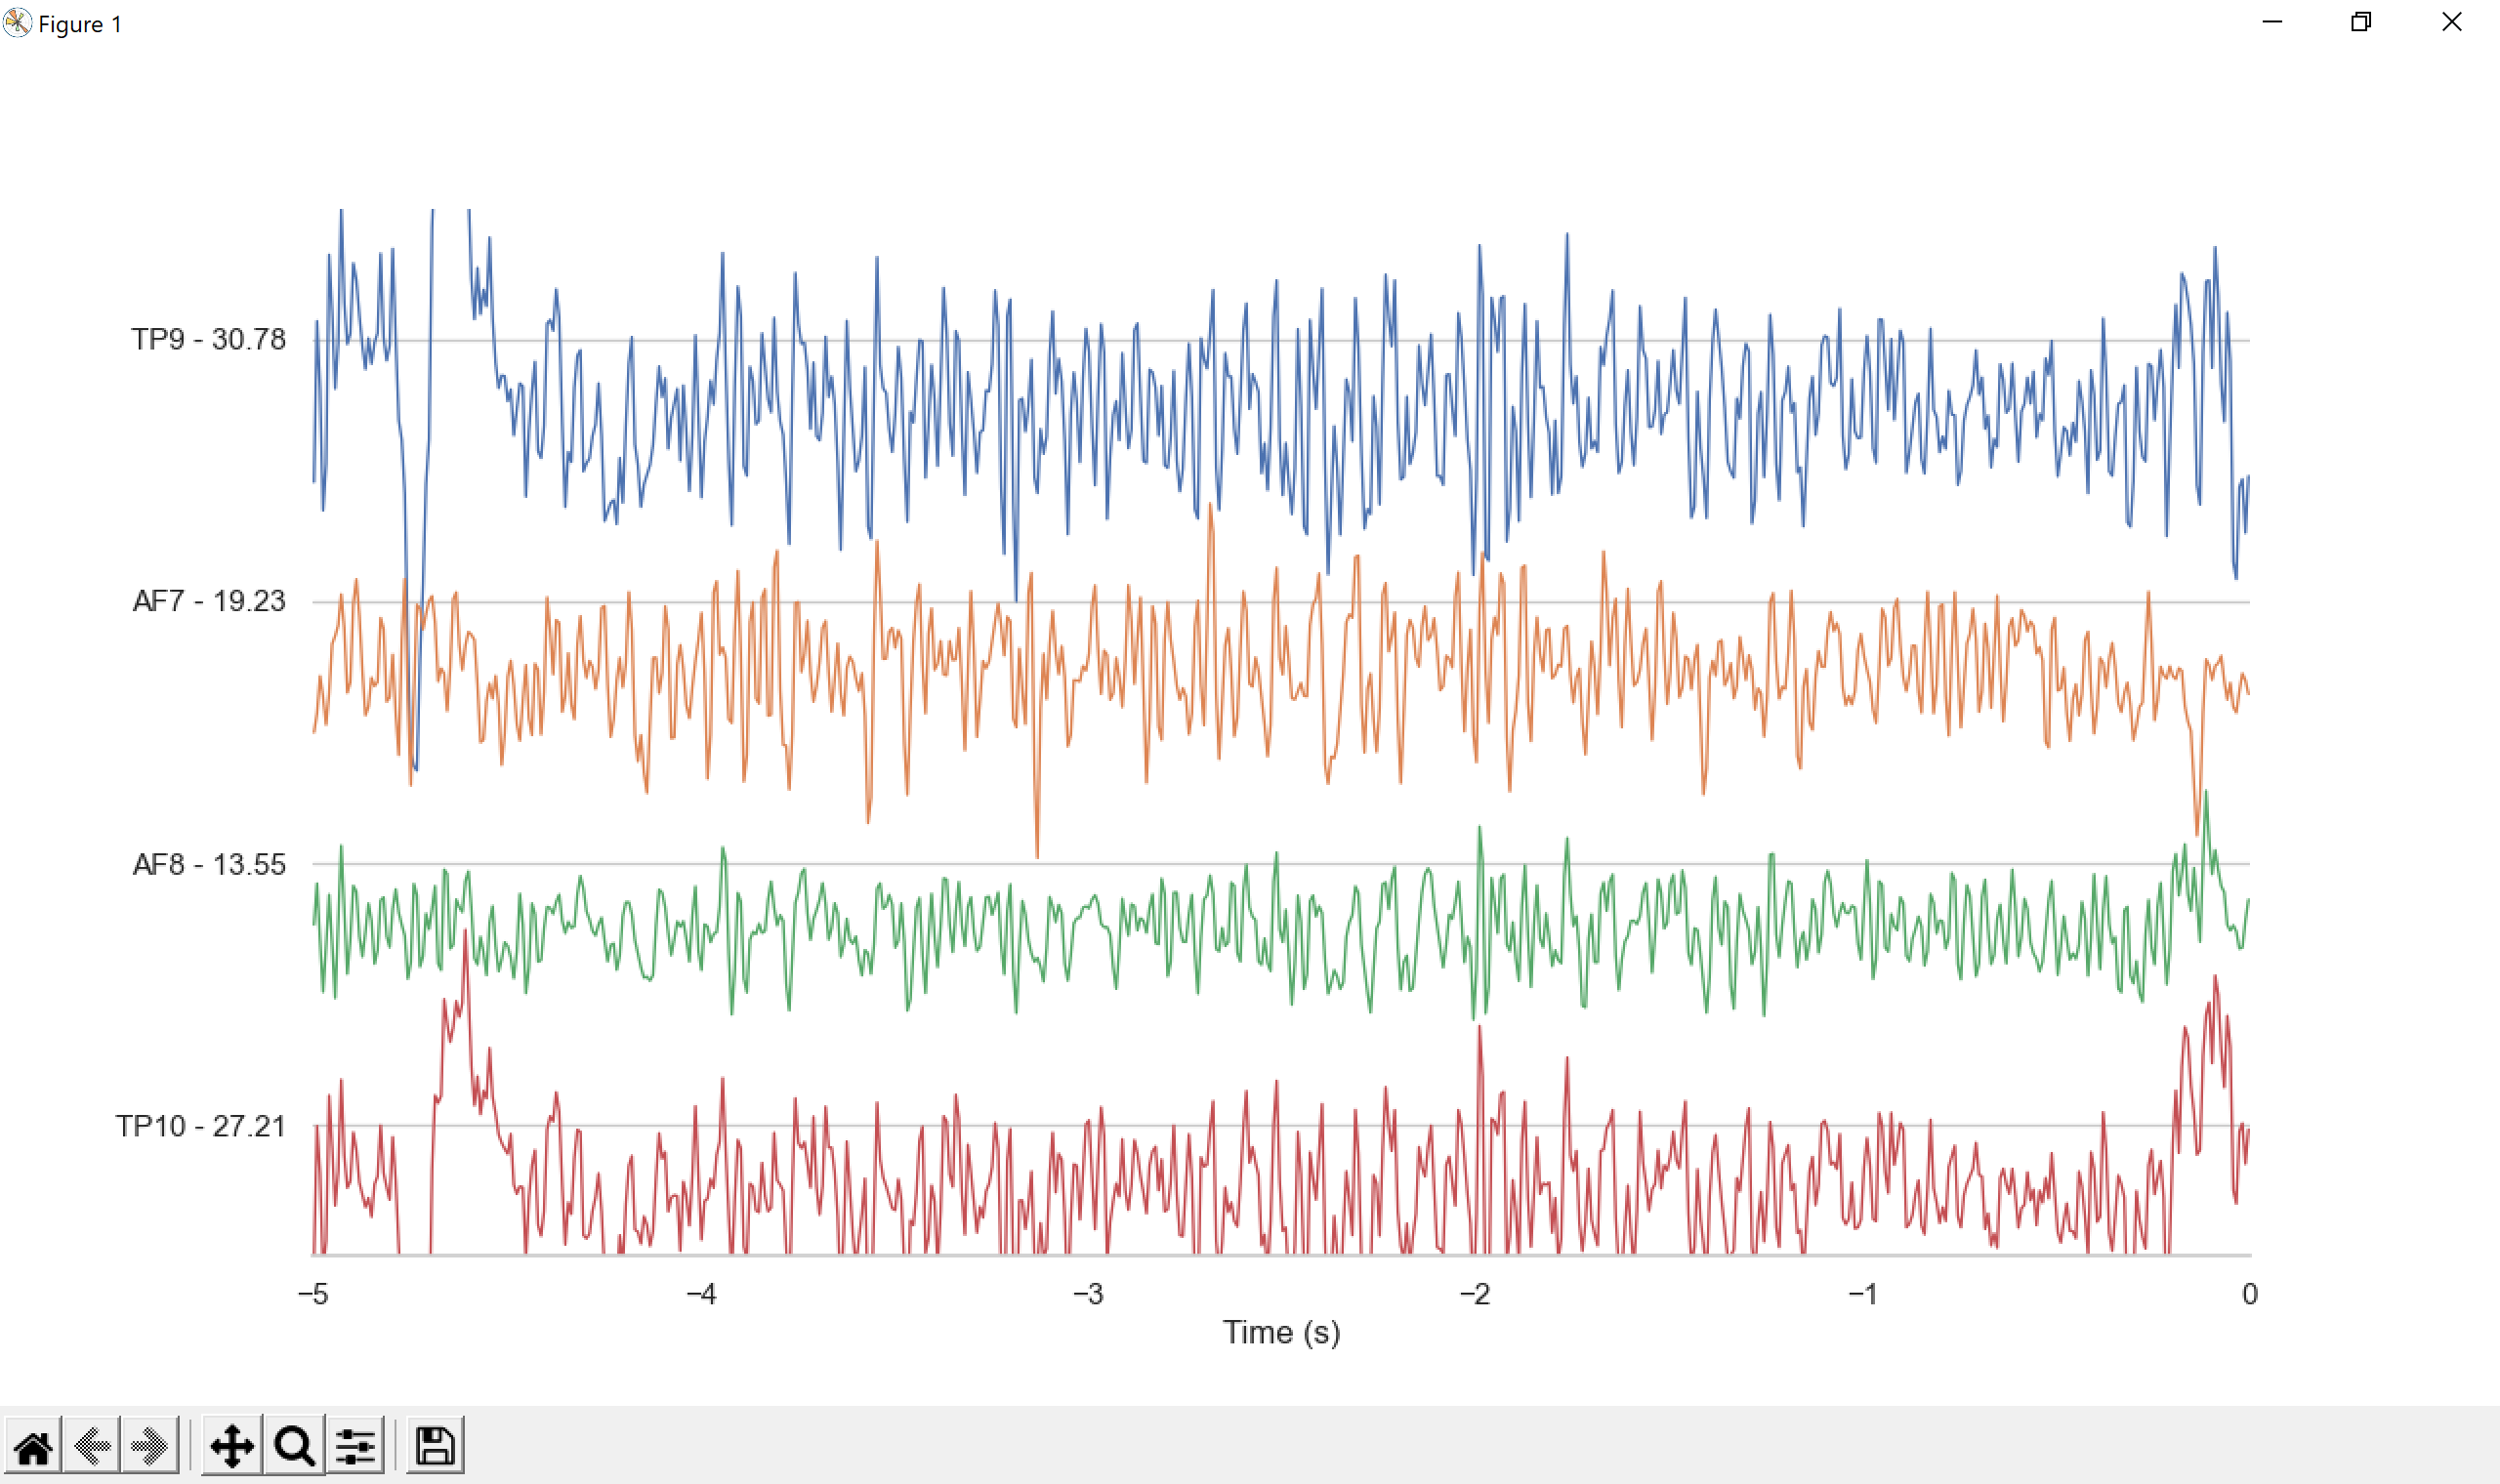
-> Emphasizes the need for stabilized dataset

<a id='current_focus'></a>
### Minecraft State Classification

- Task 1. Randomly moving or jumping around in any direction (wandering) - `0.0`

- Task 2. Simply mining with any tool user wants (mining) `1.0`

- Task 3. Continuously building blocks of user's choice, could be a simple N x N shape (building) `2.0`

** To be added in the future
- Task 4. Stay stationary and unfocused in game (stationary) `3.0`

### Step to check if collected dataset consists of stabilized records

Bringing data from directory: /Users/andyko/Desktop/EEG_Classification/dataset/raw_dataset/minecraft-state/

subjectb-wandering-1.csv, shape = ((14136, 5))
subjectc-mining-1.csv, shape = ((14124, 5))
subjectc-mining-2.csv, shape = ((13992, 5))
subjectb-mining-1.csv, shape = ((14147, 5))
subjectc-wandering-2.csv, shape = ((14006, 5))
subjectc-wandering-1.csv, shape = ((14121, 5))
subjectc-building-2.csv, shape = ((13991, 5))
subjectc-building-1.csv, shape = ((14131, 5))
subjectb-building-1.csv, shape = ((14136, 5))
subjecta-mining-1.csv, shape = ((14129, 5))
subjecta-wandering-1.csv, shape = ((14136, 5))


/Users/andyko/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


subjecta-building-1.csv, shape = ((14136, 5))


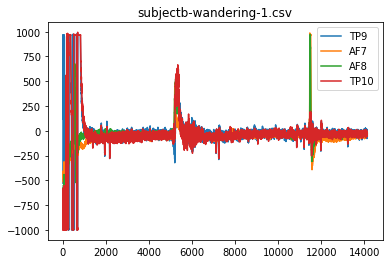

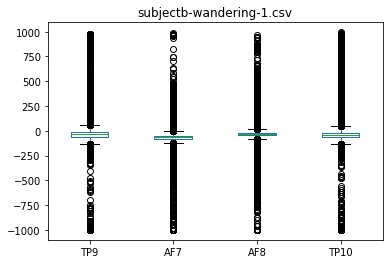

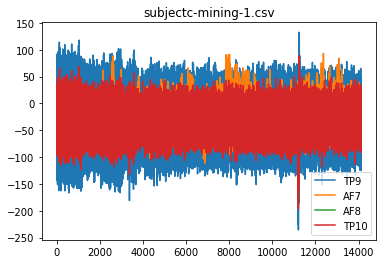

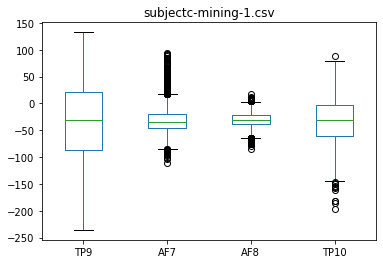

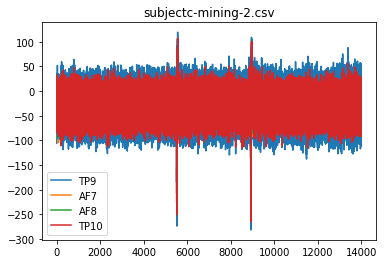

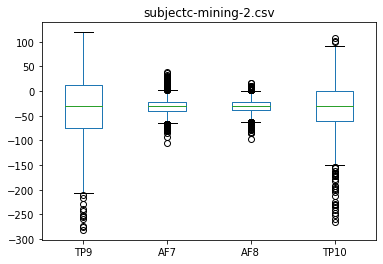

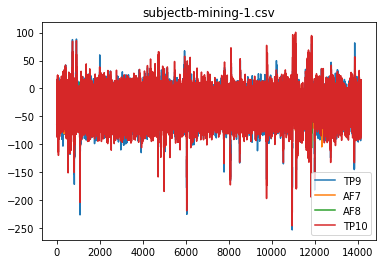

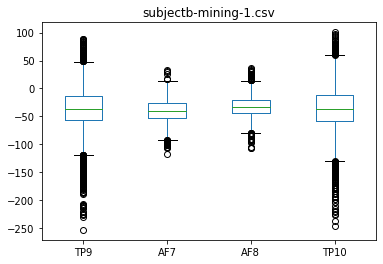

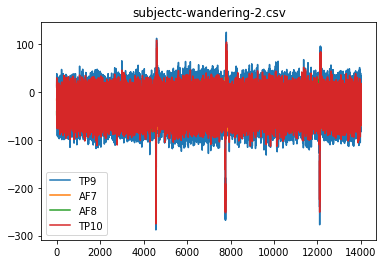

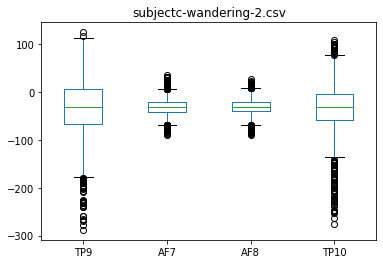

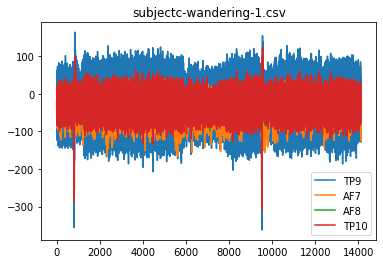

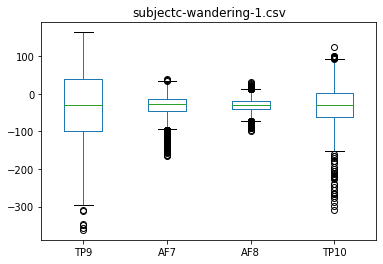

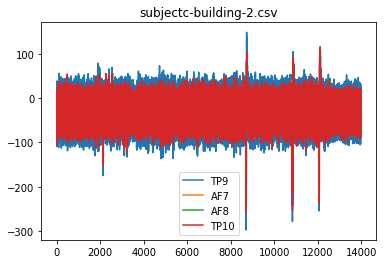

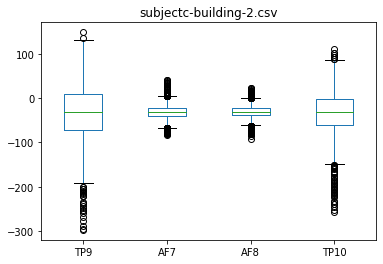

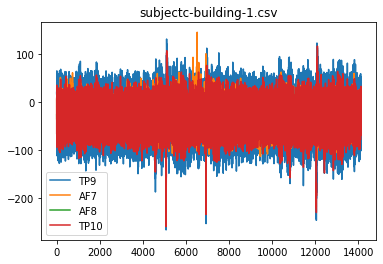

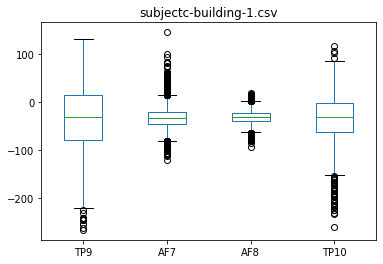

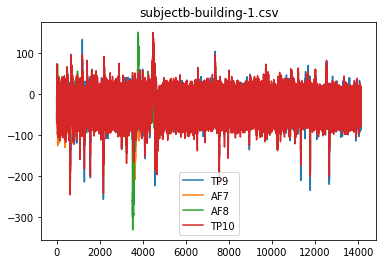

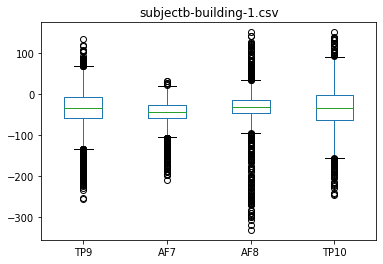

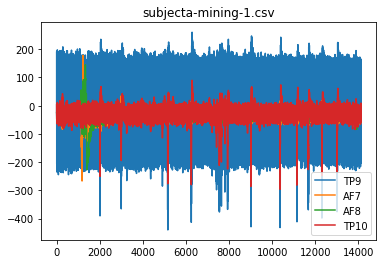

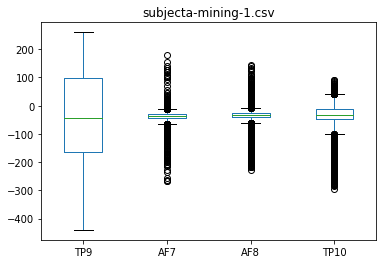

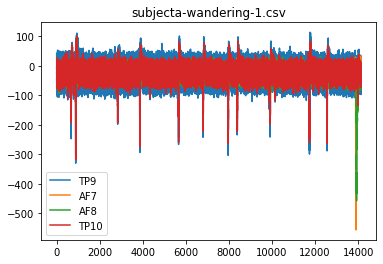

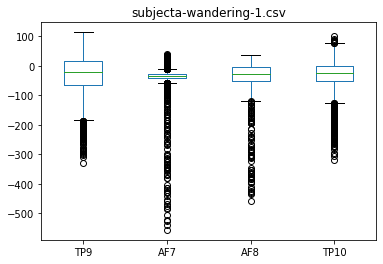

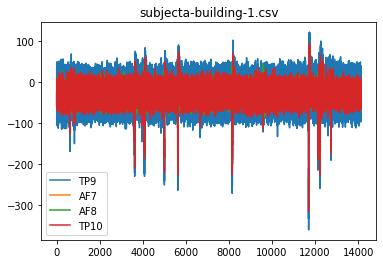

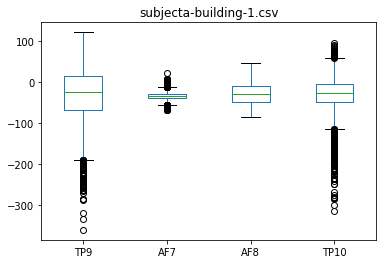

In [2]:
# Place the collected dataset in "~/dataset/raw_dataset"
# dir_name is the name of the directory inside raw_dataset directory to turn into training dataset
dir_name = 'minecraft-state'

directory = os.getcwd() + '/dataset/raw_dataset/' + dir_name + '/'
files = os.listdir(directory)

print('Bringing data from directory: {}\n'.format(directory))
for filename in files:
    if '.csv' in filename:
        df = pd.read_csv(directory + filename)
#         print(df.head())
        print('{}, shape = ({})'.format(filename, df.shape))
        df = df.drop(columns=['timestamps'])
        df.plot(title=filename)
        df.plot(title=filename, kind='box')

### Generate training data if raw collected data looks fine (stabilized overall)

In [3]:
import EEG_feature_extraction as efe
from EEG_generate_training_matrix import gen_training_matrix

# Edit filename (from new dataset folder) here
filename = dir_name

print('Generating matrix from: {}'.format(directory))

outfile_path = os.getcwd() + '/dataset/training_dataset/' + filename + '.csv'

gen_training_matrix(directory, outfile_path, [])

Generating matrix from: /Users/andyko/Desktop/EEG_Classification/dataset/raw_dataset/minecraft-state/
Using file subjectb-wandering-1.csv
resulting vector shape for the file (108, 989)
Using file subjectc-mining-1.csv
resulting vector shape for the file (108, 989)
Using file subjectc-mining-2.csv
resulting vector shape for the file (108, 989)
Using file subjectb-mining-1.csv
resulting vector shape for the file (108, 989)
Using file subjectc-wandering-2.csv
resulting vector shape for the file (108, 989)
Using file subjectc-wandering-1.csv
resulting vector shape for the file (108, 989)
Using file subjectc-building-2.csv
resulting vector shape for the file (108, 989)
Using file subjectc-building-1.csv
resulting vector shape for the file (108, 989)
Using file subjectb-building-1.csv
resulting vector shape for the file (108, 989)
Using file subjecta-mining-1.csv
resulting vector shape for the file (108, 989)
Using file subjecta-wandering-1.csv
resulting vector shape for the file (108, 989)


In [4]:
df = pd.read_csv(outfile_path)
print(df['Label'].value_counts())
print('df shape: {}'.format(df.shape))
df

0.0    432
2.0    432
1.0    432
Name: Label, dtype: int64
df shape: (1296, 989)


,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-34.357051,-44.513727,-41.768996,-33.018109,-5.240373,8.865093,-1.339815,-4.780758,-30.162334,-51.745558,...,0.003881,0.010268,0.005413,0.003378,0.001850,0.003960,0.004837,0.004268,0.002775,1.0
1,-30.960090,-30.881883,-30.902844,-29.726020,-8.484287,-8.564791,2.816851,-2.333716,-31.595542,-31.351617,...,0.016997,0.016203,0.010031,0.019297,0.012398,0.002101,0.010670,0.017155,0.012237,0.0
2,-32.251486,-33.314208,-30.614275,-30.579812,1.379603,1.890292,1.358080,3.282841,-27.631162,-31.735415,...,0.019802,0.025033,0.031279,0.020864,0.028348,0.017179,0.006573,0.014619,0.015538,1.0
3,-27.953122,-37.036327,-27.822441,-28.818205,-2.757880,-4.341731,5.836210,1.835496,-27.656430,-38.654337,...,0.012882,0.006843,0.014618,0.007985,0.010804,0.007885,0.013901,0.021192,0.004617,2.0
4,-32.481296,-31.072474,-30.817672,-32.124285,0.880192,2.640196,1.583962,-1.004541,-35.080658,-30.324964,...,0.025317,0.023826,0.013333,0.024490,0.029678,0.009991,0.015509,0.014864,0.014201,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,-42.773420,-36.686192,-36.791502,-28.747314,-6.130909,-2.977402,6.084031,-88.978524,-10.501567,-23.614239,...,0.025725,0.012566,0.017726,0.016452,0.018847,0.007810,0.006677,0.022360,0.001569,2.0
1292,-31.164810,-30.468399,-29.556167,-31.480911,-5.384758,-1.034747,-1.700112,-2.597857,-31.008089,-31.286404,...,0.034003,0.015878,0.009436,0.017933,0.030176,0.024977,0.016867,0.015549,0.009387,2.0
1293,83.944938,-146.341100,-46.639351,176.294085,1095.526000,61.021680,116.568023,1337.998696,-709.128505,-188.035703,...,0.003534,0.010222,0.013407,0.011916,0.006561,0.004092,0.010062,0.013797,0.013121,0.0
1294,-30.637639,-30.691689,-29.789172,-32.596766,-0.090720,-0.827246,2.753734,1.225965,-34.732374,-32.768818,...,0.019720,0.021334,0.017600,0.004191,0.018694,0.009140,0.018234,0.012517,0.016309,2.0


## Other Approaches
 Done before August ``(Use for reference)`` <br>
 **Not much relevant

### KNN Algorithm

In [12]:
def preprocess_inputs(df):
    df = df.copy()
    
    y = df['Label'].copy()
    X = df.drop('Label', axis=1).copy()
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = preprocess_inputs(df)

In [11]:
from sklearn import preprocessing

filename = 'minecraft-state'

outfile_path = os.getcwd() + '/dataset/training_dataset/' + filename + '.csv'

df = pd.read_csv(outfile_path)
print(df['Label'].value_counts())
print('df shape: {}'.format(df.shape))
df

0.0    325
2.0    324
1.0    324
Name: Label, dtype: int64
df shape: (973, 989)


,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,-32.154915,-38.225452,-28.599344,-30.135834,6.803057,5.225593,1.649192,4.854986,-32.617780,-42.057168,...,0.037577,0.026346,0.038671,0.044081,0.030746,0.012169,0.016596,0.012201,0.013379,2.0
1,-35.142831,-39.223388,-27.766906,-34.991569,2.398636,-2.235254,2.033929,4.384926,-43.317410,-39.067399,...,0.004435,0.022129,0.013027,0.003004,0.015533,0.022746,0.012299,0.007075,0.024237,1.0
2,-32.548954,-40.783730,-30.661788,-33.093772,-2.622299,-2.152502,0.231816,0.484548,-31.462627,-38.090302,...,0.034697,0.019636,0.024048,0.024585,0.026056,0.032212,0.037245,0.022134,0.021206,2.0
3,-39.512475,-44.579129,-29.252835,-36.577075,-3.722855,-2.184927,1.894596,-1.376476,-29.774390,-39.678152,...,0.028276,0.022365,0.031524,0.014410,0.021651,0.021817,0.010353,0.011237,0.007726,2.0
4,-9.200765,163.049569,120.176561,-0.160824,42.486742,415.572946,301.298434,52.962178,-28.159193,-41.692288,...,0.003679,0.009024,0.005311,0.001758,0.003479,0.005200,0.007017,0.002784,0.003826,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,-22.166039,-34.030333,-26.453365,-23.609843,5.130053,0.350995,0.574369,7.962462,-21.720876,-36.235050,...,0.024663,0.018919,0.021896,0.019785,0.027643,0.021995,0.006676,0.024823,0.010953,0.0
969,-19.669118,-35.359204,-27.159941,-22.330722,-16.951093,-1.026881,1.026953,-17.099711,-10.006260,-32.865070,...,0.025038,0.020321,0.019798,0.017891,0.014547,0.008585,0.008694,0.006551,0.004816,0.0
970,26.812232,-598.593236,-674.365386,-468.112799,518.590663,116.055408,213.795310,990.246248,494.250502,-409.155657,...,0.022302,0.023809,0.014034,0.017585,0.026038,0.008745,0.027847,0.016975,0.021814,0.0
971,-26.429620,-34.773938,-27.886926,-27.678752,3.838017,-3.782865,-1.324432,4.283563,-28.534060,-30.811800,...,0.028103,0.007661,0.007353,0.007109,0.011065,0.004962,0.014220,0.008101,0.002246,0.0


Test Accuracy: 86.986%


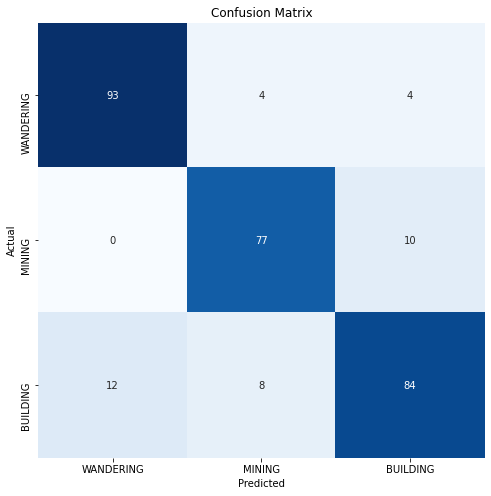

Classification Report:
----------------------
               precision    recall  f1-score   support

   WANDERING       0.89      0.92      0.90       101
      MINING       0.87      0.89      0.88        87
    BUILDING       0.86      0.81      0.83       104

    accuracy                           0.87       292
   macro avg       0.87      0.87      0.87       292
weighted avg       0.87      0.87      0.87       292



In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy: {:.3f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

label_mapping = {'WANDERING': 0, 'MINING': 1, 'BUILDING': 2}
# y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

### XGBoost Algorithm

In [16]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = XGBClassifier()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

label_mapping = {'WANDERING': 0, 'MINING': 1, 'BUILDING': 2}
# y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

import joblib

# to save the model
joblib.dump(model, open(os.getcwd() + '/saved_models/xgb.joblib', 'wb'))

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/andyko/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/andyko/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [13]:
# to load the saved model
bst = joblib.load(open(os.getcwd() + '/saved_models/xgb.joblib', 'rb'))
y_preds = bst.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy: {:.3f}%".format(accuracy_score(y_test, y_preds)*100))

NameError: name 'joblib' is not defined